In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import math



from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
!pip install imblearn
from imblearn.over_sampling import SMOTE


%matplotlib inline



In [168]:
data = pd.read_csv("C:Documents\diabetes_binary_health_indicators_BRFSS2015.csv")
de_data = pd.read_csv("C:Documents\diabetes_binary_health_indicators_BRFSS2015.csv")

In [126]:
data.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [127]:
data.shape


(253680, 22)

In [128]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [130]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [132]:
# checking for null
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [133]:
#checking unique values
nique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [134]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [135]:
v_counts(data)

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
____________________________________________

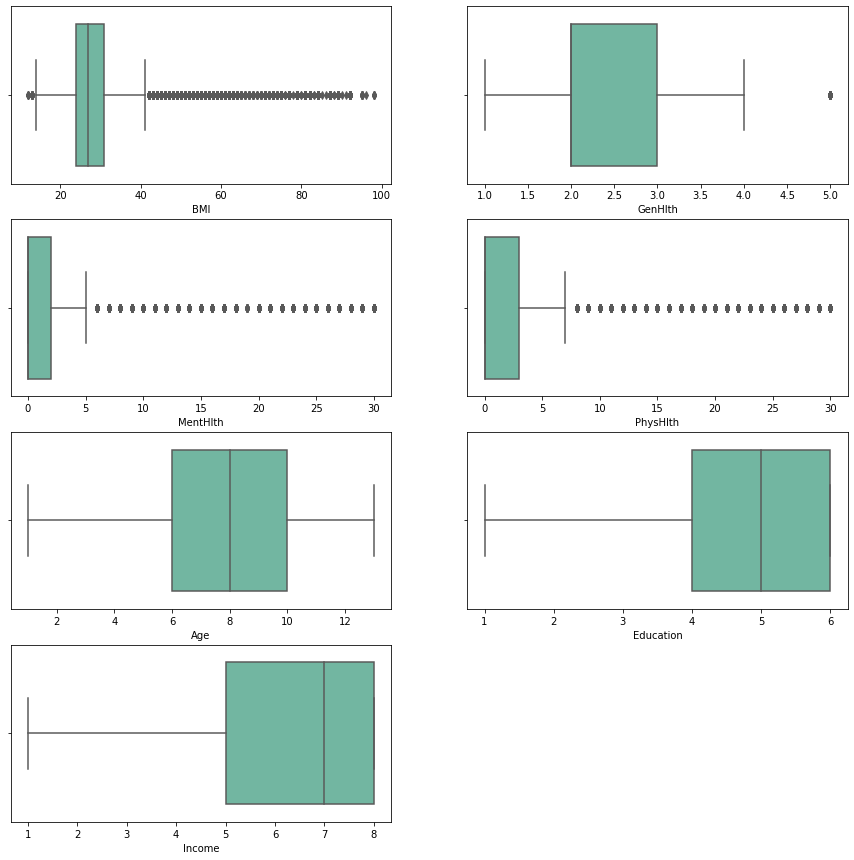

In [136]:
#cheching for outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

In [137]:
#checking for duplicates
data.duplicated().sum()

24206

In [138]:
data.drop_duplicates(inplace = True)

In [139]:
data.duplicated().sum()

0

In [140]:
data.shape

(229474, 22)

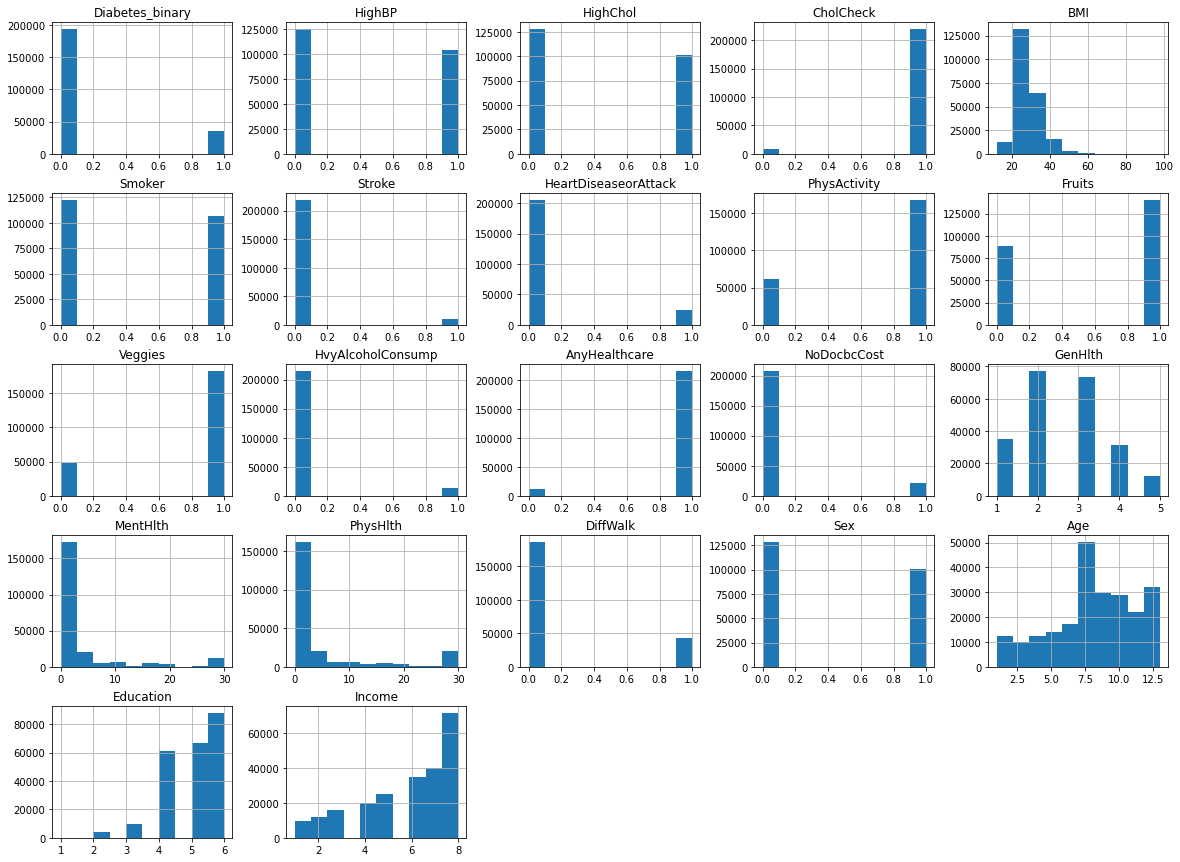

In [145]:
#using histogram to understand dataset df1 better

data.hist(figsize=(20,15));


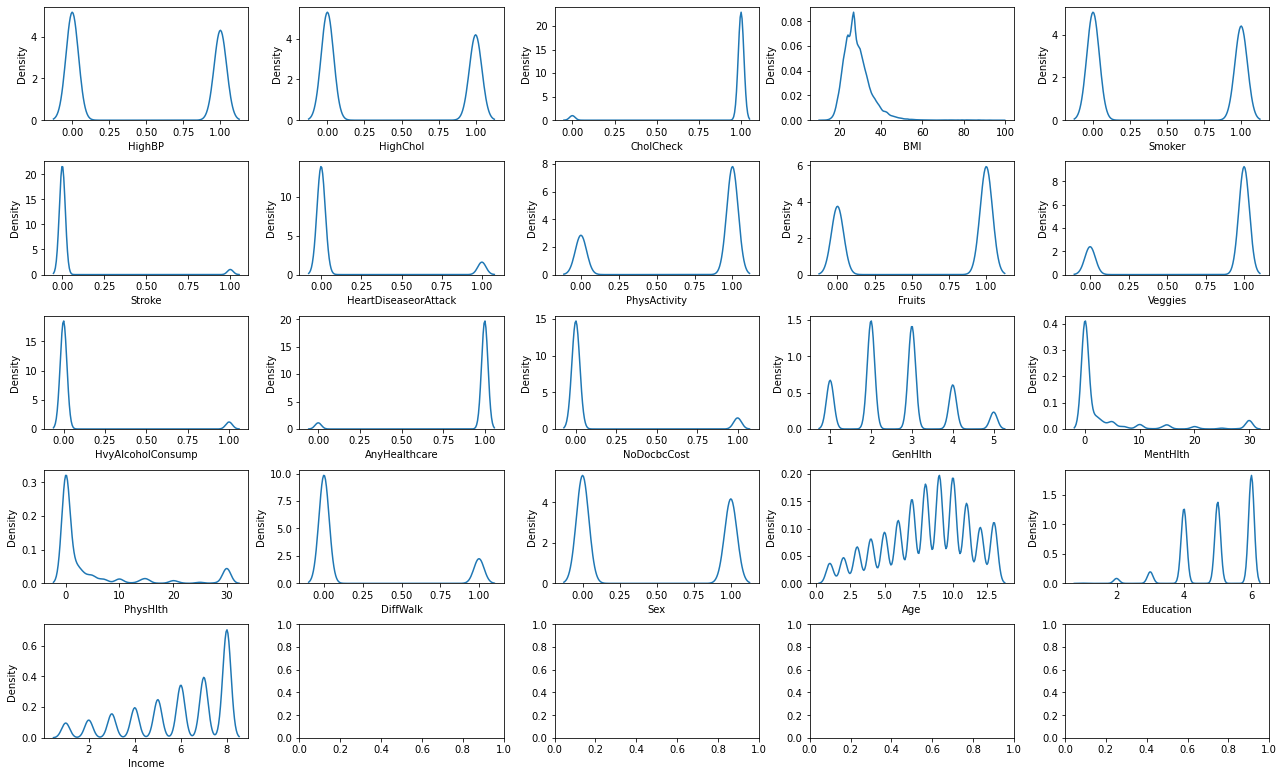

In [144]:
# Create a list of all column names, except for 'Diabete_Binary'.
cols = list(data.iloc[:, 1:])

# Create a 5x5 matrix of subplots and add padding around them for readability.
fig, axes = plt.subplots(5, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a KDE for each one.
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=data[cols[i]])

Text(0.5, 1.0, 'correlation of feature')

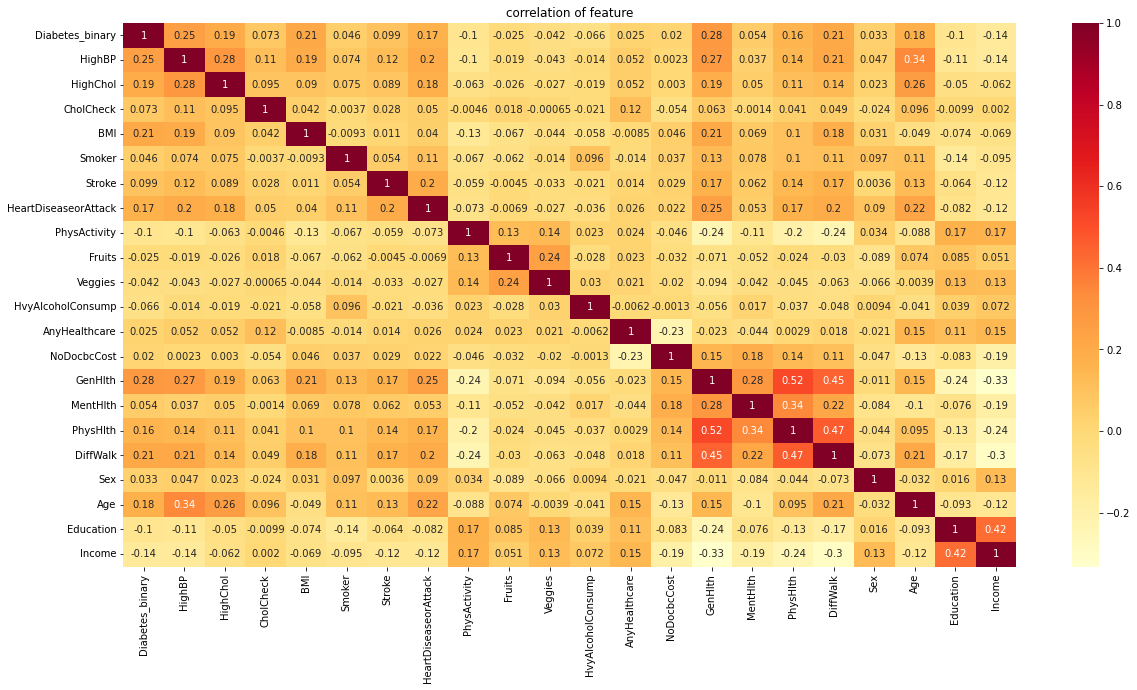

In [146]:
#using heatmap to understand correlation better in dataset df1 
#Heatmap of correlation


plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [179]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  

data["Diabetes_binary_"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [148]:
#help us to show the categorical variable 
data2 = data.copy() 

In [149]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'
data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'
data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'
data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

C:\Users\HP\AppData\Local\Temp\ipykernel_15932\1151367089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Age[data2['Age'] == 1] = '18 to 24'
C:\Users\HP\AppData\Local\Temp\ipykernel_15932\1151367089.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
C:\Users\HP\AppData\Local\Temp\ipykernel_15932\1151367089.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [150]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

No Diabetes    194377
Diabetes        35097
Name: Diabetes_binary, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


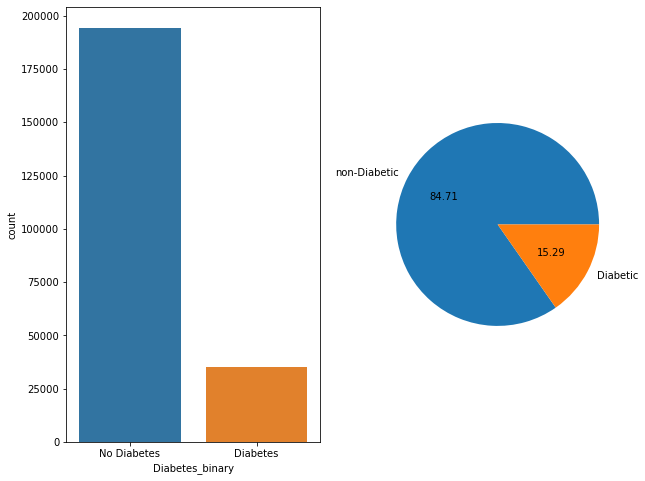

In [152]:
#checking the value count of Diabetes_binary_ by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(data2['Diabetes_binary'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );


The feature "Age" and it's relation with the target

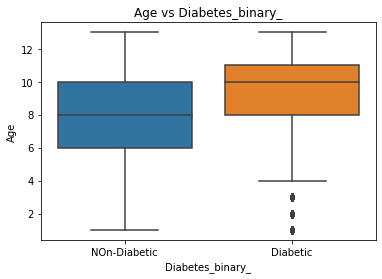

In [154]:
sns.boxplot(x = 'Diabetes_binary_', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_')
plt.show()

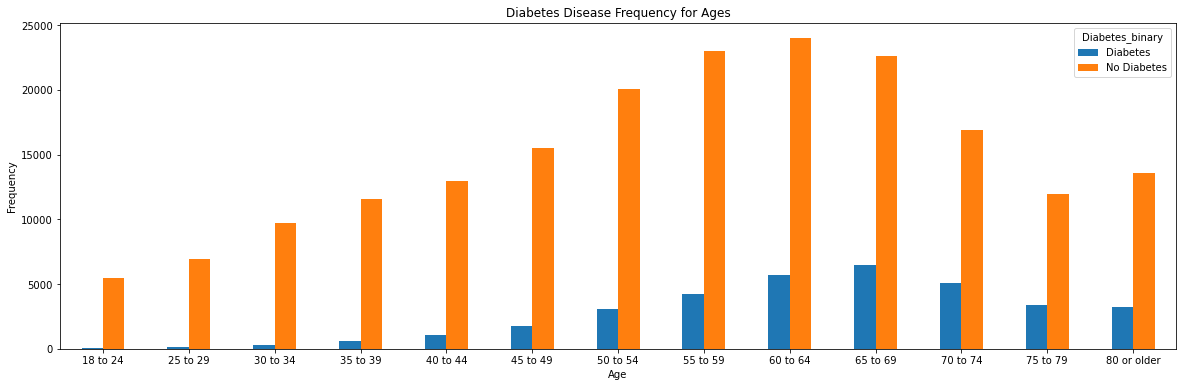

In [155]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [157]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary_
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,NOn-Diabetic
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,NOn-Diabetic
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,NOn-Diabetic
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,NOn-Diabetic
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,NOn-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,NOn-Diabetic
253676,1,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,Diabetic
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,NOn-Diabetic
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,NOn-Diabetic


We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

The feature "Education" and it's relation with the target

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


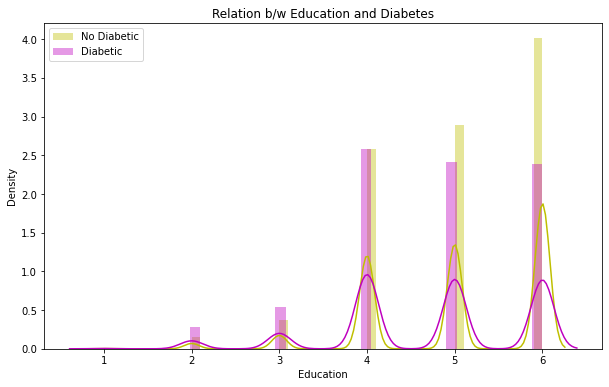

In [158]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

We can see that most of people have high education and in the high level of education , the healthy people is more than others

The feature "income" and it's relation with the target

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 1440x720 with 0 Axes>

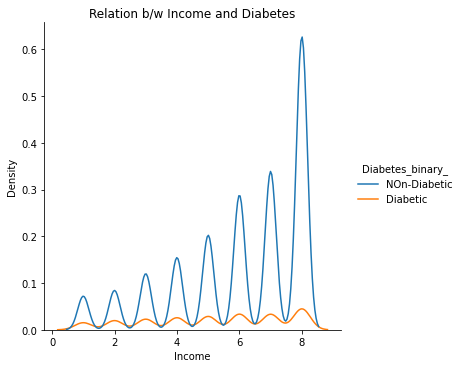

In [159]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_", kind="kde")
plt.title("Relation b/w Income and Diabetes")

We can see that most of people have high income and in the high level of income , the healthy people is more than others

The feature "BMI" and it's relation with the target

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


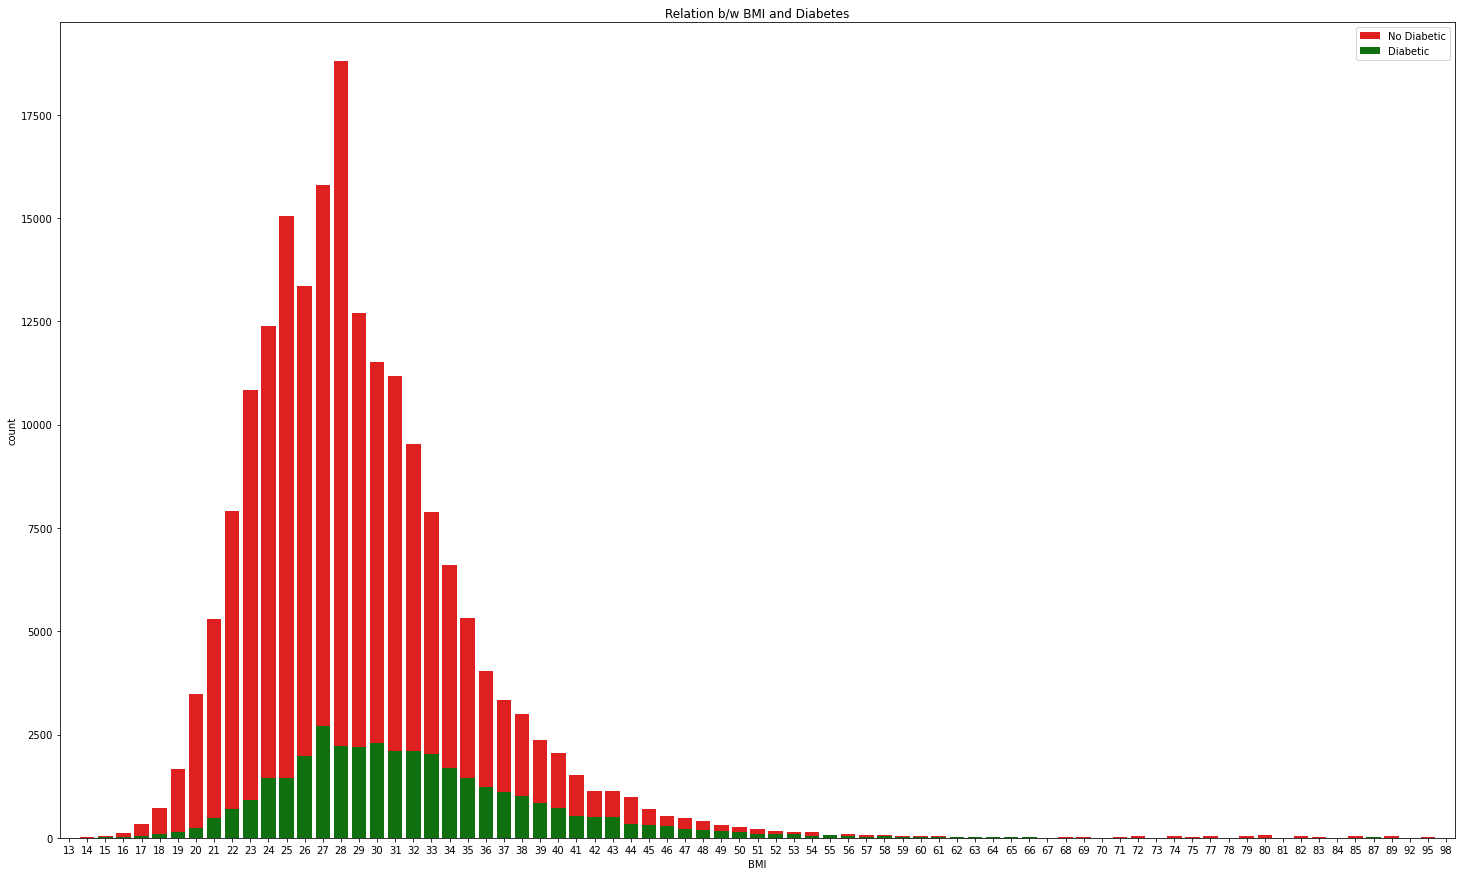

In [160]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI 

plt.figure(figsize=(25, 15))

sns.countplot(data.BMI[data.Diabetes_binary == 0], color="r", label="No Diabetic")
sns.countplot(data.BMI[data.Diabetes_binary == 1], color="g", label="Diabetic")
plt.title("Relation b/w BMI and Diabetes")

plt.legend()

As we can see people range between 24-33 BMI have more likely to have Diabetic.

The feature "MentHlth" and it's relation with the target

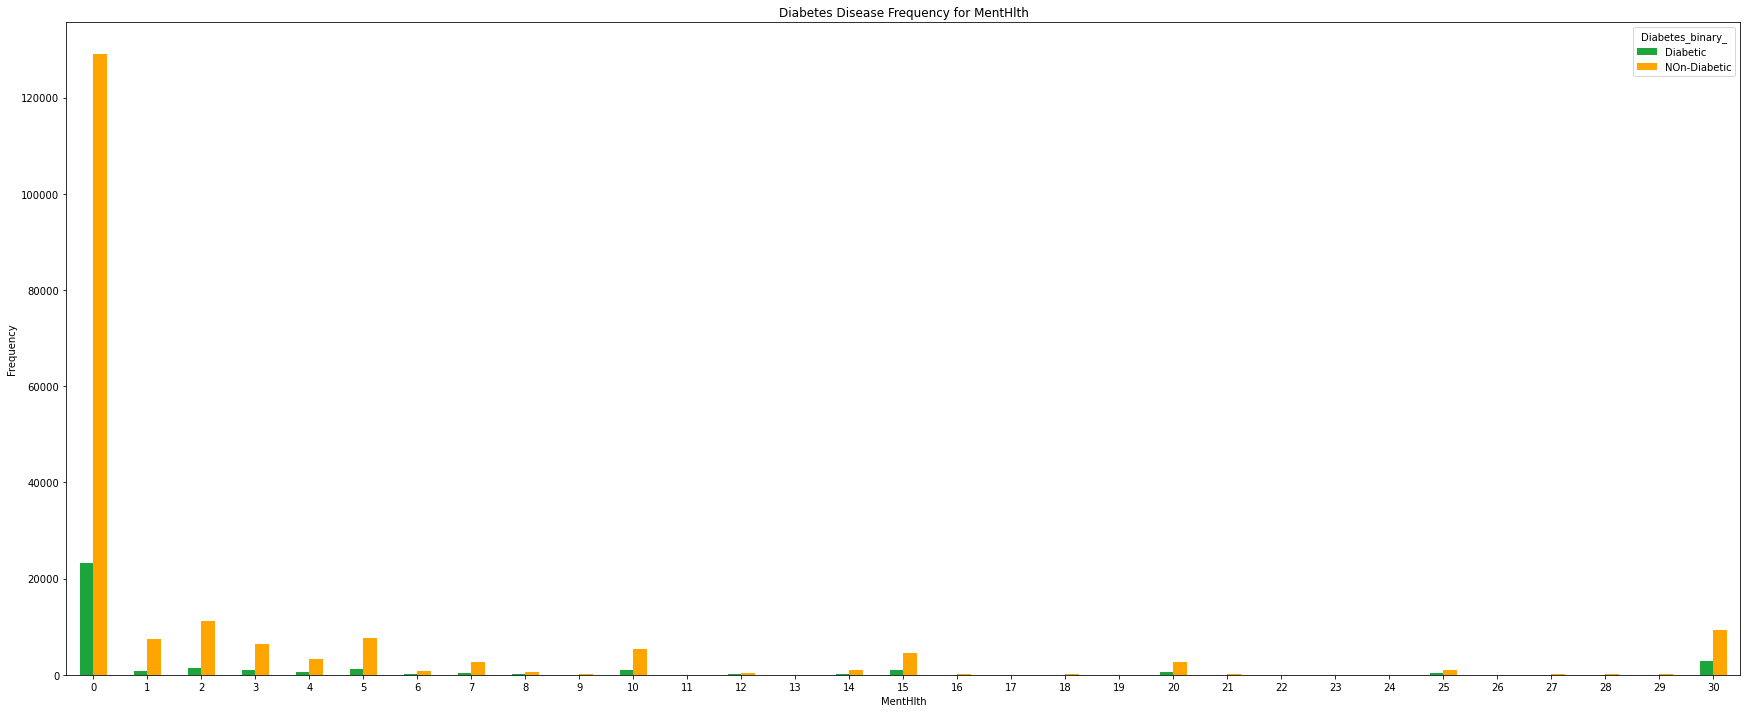

In [161]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

The feature "PhysHlth" and it's relation with the target

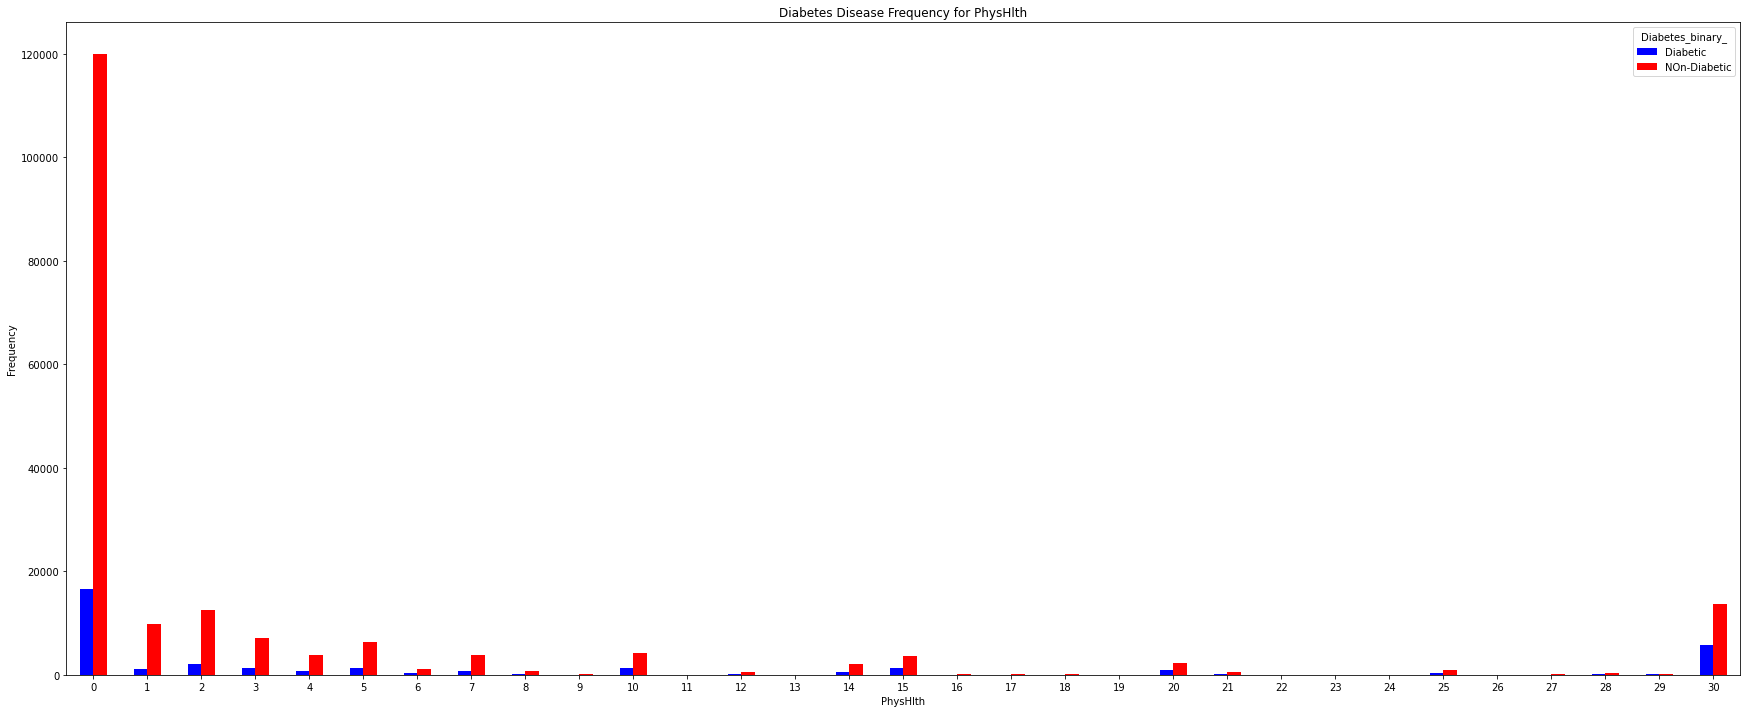

In [164]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

The feature "GenHlth" and it's relation with the target

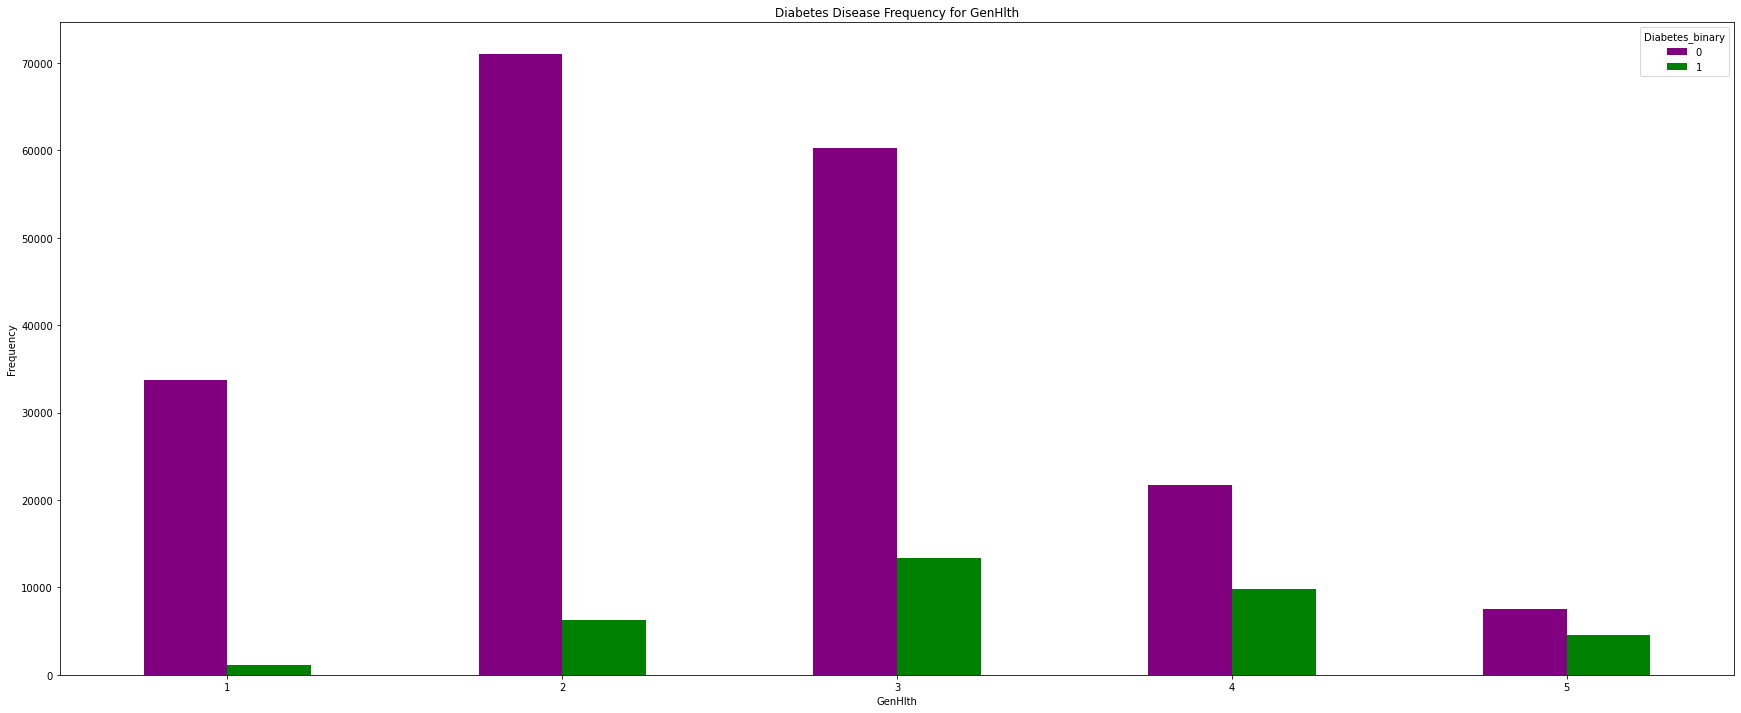

In [165]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

not many peolpe have "5" and "4" of GenHlth ,but they have diabetes !!!

# FEATURE SELECTION

With correlation

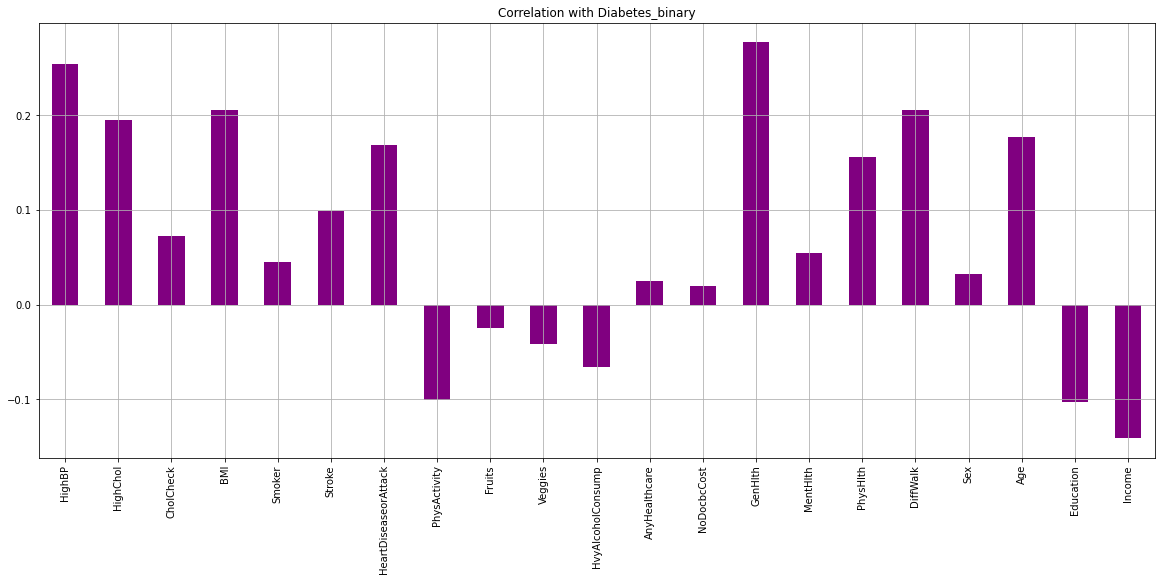

In [166]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

Diabetes_binary's relation with other columns Through bar Graph Result:

1) Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2) HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

VIF Test

In [169]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(de_data)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   116.856706
Diabetes_binary           1.193120
HighBP                    1.344502
HighChol                  1.180932
CholCheck                 1.033501
BMI                       1.160280
Smoker                    1.091872
Stroke                    1.081612
HeartDiseaseorAttack      1.175776
PhysActivity              1.157396
Fruits                    1.112540
Veggies                   1.112397
HvyAlcoholConsump         1.025418
AnyHealthcare             1.113209
NoDocbcCost               1.144200
GenHlth                   1.821914
MentHlth                  1.239497
PhysHlth                  1.623288
DiffWalk                  1.536636
Sex                       1.075748
Age                       1.354954
Education                 1.326495
Income                    1.505649
dtype: float64


ANOVA Test

In [170]:
X = de_data.iloc[:,1:]
Y = de_data.iloc[:,0]

In [171]:
# ANOVA feature selection for numeric input and categorical output


# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [172]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,40.0,0.0,5.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,5.0,30.0,1.0,9.0,4.0,8.0


Chi Square

In [173]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [174]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


In [ ]:
#there are the features which we will use in our model

We will use those features in our model

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be with us

In [180]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_"]

In [181]:
data.drop(colomns , axis= 1 ,inplace=True)

# DATA SPLITING

In [182]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

# Dealing with imbalancing

In [183]:
Y.value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [190]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [187]:
y_sm.shape , x_sm.shape

((70692,), (70692, 16))

In [188]:
y_sm.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [189]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

# Data Scalling

In [192]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Modeling

Logistic

In [193]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [199]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8750
Test set score: 0.8742


In [195]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8750
Test set score: 0.8742


In [198]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.12584873632591476
Root Mean Squared Error : 0.3547516544371777


In [200]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     10601
         1.0       0.93      0.81      0.87     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



In [210]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
print(cm1)


[[9967  634]
 [2035 8572]]


In [208]:
acc_test_lg = accuracy_score(Y_test, y_pred)

In [209]:
print(acc_test_lg)

0.8741512636740852


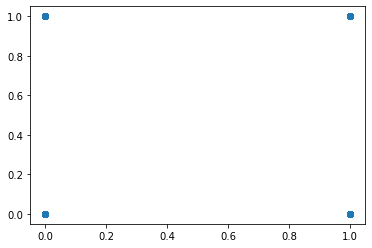

In [212]:
plt.scatter(Y_test,y_pred)

Desicion Tree model

In [219]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [223]:
# make predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8933
Test set score: 0.8829


In [224]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.117078460958129
Root Mean Squared Error : 0.34216729966221054


In [225]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89     10601
         1.0       0.96      0.80      0.87     10607

    accuracy                           0.88     21208
   macro avg       0.89      0.88      0.88     21208
weighted avg       0.89      0.88      0.88     21208



In [226]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
print(cm1)

[[10286   315]
 [ 2168  8439]]


In [227]:
acc_test_lg2 = accuracy_score(Y_test, y_pred)

In [228]:
acc_test_lg2

0.882921539041871

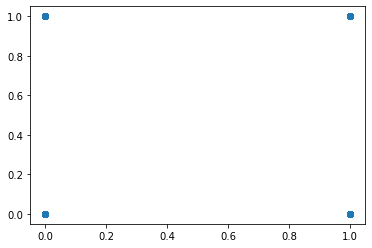

In [234]:
plt.scatter(Y_test,y_pred)

KNN

In [235]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [236]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8722
Test set score: 0.8487


In [237]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.15126367408525085
Root Mean Squared Error : 0.38892630932510963


In [238]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86     10601
         1.0       0.95      0.73      0.83     10607

    accuracy                           0.85     21208
   macro avg       0.87      0.85      0.85     21208
weighted avg       0.87      0.85      0.85     21208



In [239]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
print(cm1)

[[10209   392]
 [ 2816  7791]]


In [240]:
acc_test_lg3 = accuracy_score(Y_test, y_pred)
acc_test_lg3

0.8487363259147491

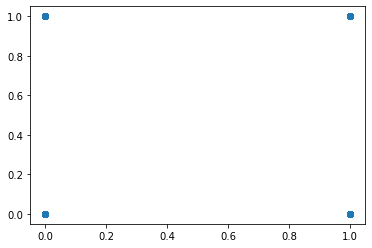

In [241]:
plt.scatter(Y_test,y_pred)

Rondom Forest

In [242]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [243]:
# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8991
Test set score: 0.8918


In [244]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.10821388155413052
Root Mean Squared Error : 0.3289587839747261


In [245]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     10601
         1.0       0.96      0.82      0.88     10607

    accuracy                           0.89     21208
   macro avg       0.90      0.89      0.89     21208
weighted avg       0.90      0.89      0.89     21208



In [246]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
print(cm1)

[[10222   379]
 [ 1916  8691]]


In [247]:
acc_test_lg4 = accuracy_score(Y_test, y_pred)
acc_test_lg4

0.8917861184458695

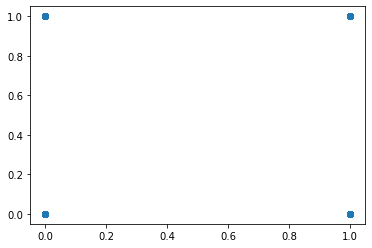

In [248]:
plt.scatter(Y_test,y_pred)

SVM

In [249]:
from sklearn.svm import SVC

# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))


Training set score: 0.8968
Test set score: 0.8950


In [250]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.10496039230479065
Root Mean Squared Error : 0.3239759131552694


In [251]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     10601
         1.0       0.97      0.82      0.89     10607

    accuracy                           0.90     21208
   macro avg       0.90      0.90      0.89     21208
weighted avg       0.90      0.90      0.89     21208



In [252]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
print(cm1)

[[10311   290]
 [ 1936  8671]]


In [253]:
acc_test_lg5 = accuracy_score(Y_test, y_pred)
acc_test_lg5

0.8950396076952094

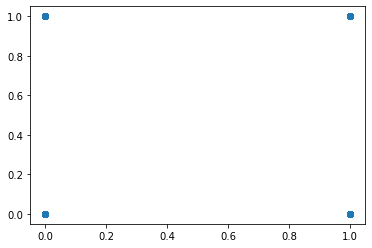

In [254]:
plt.scatter(Y_test,y_pred)